In [15]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
from scipy.misc import imread
from PIL import Image
%matplotlib inline

In [16]:
img = Image.open('C:/Users/Timothy/Desktop/Winslow.png')

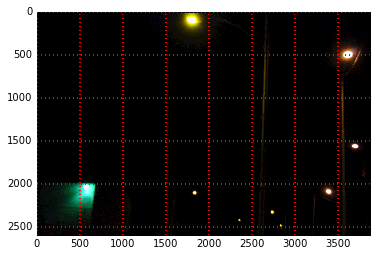

In [17]:
plt.imshow(img)
plt.grid(b=True, which ='major', color='r', linewidth = 2)

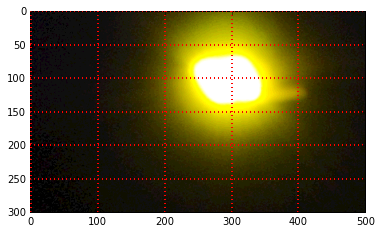

In [18]:
img = img.crop((1500, 0, 2000, 300))
plt.imshow(img)
plt.grid(b=True, which ='major', color='r', linewidth =2)

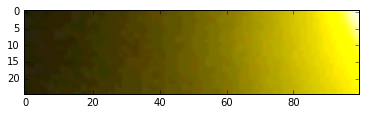

In [19]:
img = img.crop((150, 100, 250, 125))
plt.imshow(img)

In [20]:
# img = img.crop((20, 5, 40, 40))
# plt.imshow(img)

In [21]:
img.save('C:/Users/Timothy/Dropbox/File _requests/Hawaii_Astronomy_Conf_Presentation/img.jpg')
img = imread('C:/Users/Timothy/Dropbox/File _requests/Hawaii_Astronomy_Conf_Presentation/img.jpg').astype(np.float32)

In [22]:
def rgbw(img):
    red, green, blue = np.zeros(shape=(img.shape[0], img.shape[1], 3)), np.zeros(shape=(img.shape[0], img.shape[1], 3)), np.zeros(shape=(img.shape[0], img.shape[1], 3))
    red[:,:,0], green[:,:,1], blue[:,:,2] = img[:,:,0], img[:,:,1], img[:,:,2]
    blue_, green_, red_ = pd.DataFrame(blue[:,:,2]), pd.DataFrame(green[:,:,1]),pd.DataFrame(red[:,:,0])
    return red_, green_ , blue_, red, green, blue

red_, green_, blue_, red, green, blue = rgbw(img)

In [23]:
red = red.astype(np.uint8)
green = green.astype(np.uint8)
blue = blue.astype(np.uint8)

In [24]:
thresh_lim = [np.amax(red), np.amax(green), np.amax(blue)]
if min(thresh_lim) < 255:
    thresh_lim = min(thresh_lim)
else:
    thresh_lim = 240
    
thresh_lim

239

In [25]:
# red[red < 40] = 0
red[red > thresh_lim] = 0
green[:,:,1][red[:,:,0] == 0] = 0
blue[:,:,2][red[:,:,0] == 0] = 0

# blue[blue < 10] = 0
blue[blue > thresh_lim] = 0
green[:,:,1][blue[:,:,2] == 0] = 0
red[:,:,0][blue[:,:,2] == 0] = 0

# green[green < 40] = 0
green[green > thresh_lim] = 0
red[:,:,0][green[:,:,1] == 0] = 0
blue[:,:,2][green[:,:,1] == 0] = 0

img = red + green + blue

np.amax(green), np.amax(red), np.amax(blue), np.amax(img)

(219, 236, 11, 236)

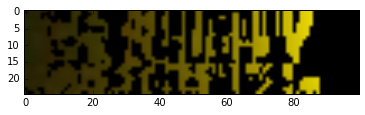

In [26]:
plt.imshow(img)

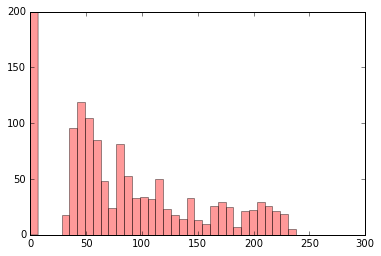

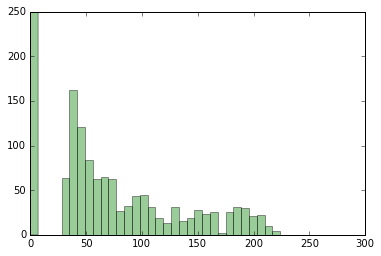

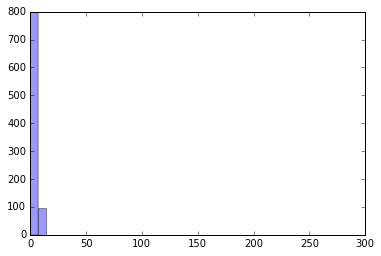

(112163, 99974, 3582, 25, 25, 25)

In [27]:
plt.hist(red.ravel(),40,[0,280], color='r', alpha =0.4); plt.ylim(0,200); plt.show()
plt.hist(green.ravel(),40,[0,280], color='g', alpha =0.4); plt.ylim(0,250); plt.show()
plt.hist(blue.ravel(),40,[0,280], color='b', alpha =0.4); plt.ylim(0,800); plt.show()

np.average(red), np.average(green), np.average(blue)
np.sum(red), np.sum(green), np.sum(blue), len(red), len(green), len(blue)

In [28]:
cv2.imwrite('D:/Python_Database/test_thresh1.png', red)
cv2.imwrite('D:/Python_Database/test_thresh2.png', green)
cv2.imwrite('D:/Python_Database/test_thresh3.png', blue)

True

In [29]:
red = cv2.imread('D:/Python_Database/test_thresh1.png')
grn = cv2.imread('D:/Python_Database/test_thresh2.png')
blue = cv2.imread('D:/Python_Database/test_thresh3.png')

red = np.float64(red)
grn = np.float64(grn)
blue = np.float64(blue)

red.shape, grn.shape, blue.shape 

((25L, 100L, 3L), (25L, 100L, 3L), (25L, 100L, 3L))

In [30]:
def four_channel(array):
    r_channel, g_channel, b_channel = cv2.split(array)
    a_channel = np.ones((array.shape[0], array.shape[1]))*0
    array = cv2.merge((r_channel, g_channel, b_channel, a_channel))
    return array

alp_red = four_channel(red)
alp_grn = four_channel(grn)
alp_blue = four_channel(blue)
alp_img = alp_red + alp_grn + alp_blue

In [31]:
def background(array,n):
    array[:,:,3][array[:,:,n] != 0] = 255
    return array

alp_red = background(alp_red,0)
alp_grn = background(alp_grn,1)
alp_blue = background(alp_blue,2)

In [32]:
np.amax(alp_red[:,:,0]), np.amax(alp_grn[:,:,1]), np.amax(alp_blue[:,:,2])

(236.0, 219.0, 11.0)

In [33]:
alp_img.shape

(25L, 100L, 4L)

In [34]:
r, g, b = [], [], []

for i, row in enumerate(alp_img):
    for j, pixel in enumerate(row):
        tempr = pixel[0]
        tempg = pixel[1]
        tempb = pixel[2]
        
        r.append(tempr), g.append(tempg), b.append(tempb)

In [35]:
r1 = filter(lambda a: a != 0, r)
g1 = filter(lambda a: a != 0, g)
b1 = filter(lambda a: a != 0, b)
r1, g1, b1 = [x/255. for x in r1], [x/255. for x in g1], [x/255. for x in b1]
r2, g2, b2 = sum(r1)/len(r1), sum(g1)/len(g1), sum(b1)/len(b1) 
r2, g2, b2

len(r1), len(g1), len(b1)

(1119, 1119, 1119)

In [36]:
from mpl_toolkits.mplot3d import Axes3D

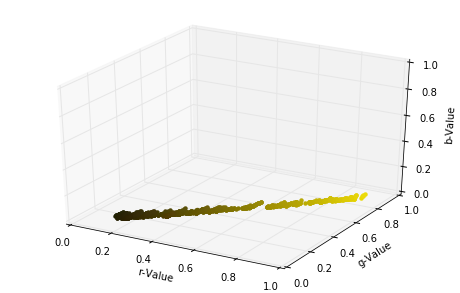

In [37]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection = '3d')

for i in range(len(r1)):
    ax.scatter(r1[i], g1[i], b1[i], c=[r1[i], g1[i], b1[i]], lw=0, marker='o', alpha=1)

ax.scatter(r2, g2, b2, c=[r2,g2,b2], marker='o', s = 55, lw=0, alpha=1)

ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)

ax.set_xlabel('r-Value')
ax.set_ylabel('g-Value')
ax.set_zlabel('b-Value')

In [38]:
# fig = plt.figure(figsize=(8,5))
# ax = fig.add_subplot(111, projection = '3d')

# for i in range(len(r1)):
#     ax.scatter(r1[i]/255, g1[i]/255, b1[i]/255, c=[r1[i]/255, g1[i]/255, b1[i]/255], lw=0, marker='o', alpha=0.09)

# ax.scatter(r2/255, g2/255, b2/255, c=[r2/255,g2/255,b2/255], marker='o', s = 55, lw=0, alpha=1)

# ax.set_xlim3d(0, 1)
# ax.set_ylim3d(0, 1)
# ax.set_zlim3d(0, 1)

# ax.set_xlabel('r-Value')
# ax.set_ylabel('g-Value')
# ax.set_zlabel('b-Value')

In [39]:
rt, gt, bt = r2, g2, b2
rt, gt, bt = np.arange(0, rt, rt/100), np.arange(0, gt, gt/100), np.arange(0, bt, bt/100)
z1 = np.zeros(len(rt))
rtz, gtz, btz=[rt]*len(rt),[gt]*len(rt),[bt]*len(rt)

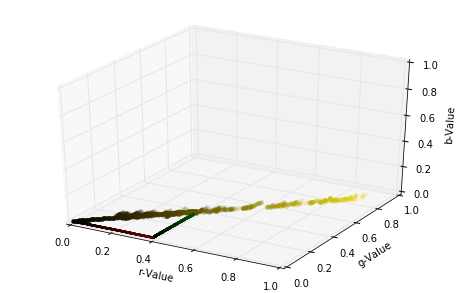

In [40]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection = '3d')

for i in range(len(r1)):
    ax.scatter(r1[i], g1[i], b1[i], c=[r1[i], g1[i], b1[i]], lw=0, marker='o', alpha=.2)

for i in range(len(rt)):
    ax.scatter(rt[i], z1[i], z1[i], c=[rt[i], z1[i], z1[i]], s=8, marker='o', lw=0, alpha=1)
    ax.scatter(z1[i] + max(rt), gt[i], z1[i], c=[z1[i], gt[i], z1[i]], s=10, marker='o', lw=0, alpha=1)
    ax.scatter(z1[i] + max(rt), z1[i] + max(gt), bt[i], c=[z1[i], z1[i], bt[i]], s=10, marker='o', lw=0, alpha=1)
    ax.scatter(rt[i], gt[i], bt[i], c=[rt[i], gt[i], bt[i]], marker='o', lw=0, alpha=1)

ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)

ax.set_xlabel('r-Value')
ax.set_ylabel('g-Value')
ax.set_zlabel('b-Value')

In [41]:
r1lin, g1lin, b1lin =[],[],[]
for i in range(len(r1)):
    if r1[i] <= 0.0405:
        tempr = r1[i]/12.92
    else:
        tempr = ((r1[i]+0.055)/(1.055))**2.4
        
    if g1[i] <= 0.0405:
        tempg = g1[i]/12.92
    else:
        tempg = ((g1[i]+0.055)/(1.055))**2.4
        
    if b1[i] <= 0.0405:
        tempb = b1[i]/12.92
    else:
        tempb = ((b1[i]+0.055)/(1.055))**2.4

    r1lin.append(tempr), g1lin.append(tempg), b1lin.append(tempb)
    
X,Y,Z = [],[],[]
for i in range(len(r1)):
    tempX = r1lin[i]  * 0.4124 + g1lin[i] * 0.3576 + b1lin[i] * 0.1805
    tempY = r1lin[i] * 0.2126 + g1lin[i] * 0.7152 + b1lin[i] * 0.0722
    tempZ = r1lin[i] * 0.0193 + g1lin[i] * 0.1192 + b1lin[i] * 0.9505
    X.append(tempX), Y.append(tempY), Z.append(tempZ)
    
X = filter(lambda a: a != 0, X)
Y = filter(lambda a: a != 0, Y)
Z = filter(lambda a: a != 0, Z)

X = [(i/max(Y))*100 for i in X]
Z = [(i/max(Y))*100 for i in Z]
Y = [(i/max(Y))*100 for i in Y]

max(X), max(Y), max(Z)

(87.531707197146432, 100.0, 15.065721729594653)

In [42]:
x, y = [], []
for i in range(len(X)):
    tempx = X[i]/(X[i] + Y[i] + Z[i])
    tempy = Y[i]/(X[i] + Y[i] + Z[i])
    x.append(tempx), y.append(tempy)

In [43]:
x_avg, y_avg = sum(x)/len(x), sum(y)/len(y)
x_avg, y_avg

(0.43555140272886922, 0.48307084385547139)

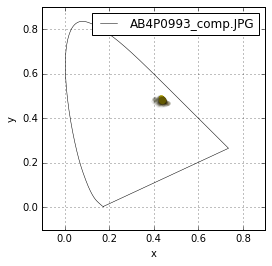

In [44]:
CIE_1931 = pd.read_csv('D:\Python_Database\CIE1931_1nm.csv')
CIE_1931 = CIE_1931.rename(columns = {CIE_1931.columns[0]:'x', CIE_1931.columns[1]:'y'})
plt.plot(CIE_1931['x'], CIE_1931['y'], c='k', linewidth = 0.5, label='AB4P0993_comp.JPG')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(); plt.ylim(-.1,.9); plt.xlim(-.1,.9)
plt.xlabel('x'); plt.ylabel('y')
plt.legend()

for i in range(len(x)):
    plt.scatter(x[i],y[i], c=[r1[i], g1[i], b1[i]], lw=0, alpha=.02)

plt.scatter(x_avg, y_avg, c=[r2,g2,b2], lw=0, s=55, alpha=1)
plt.show()